In [1]:
# In terminal:
# conda env create -f relatio.yml

In [2]:
import relatio

In [3]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

In [4]:
from relatio import load_data
df = load_data(dataset = "trump_tweet_archive", content = "raw")

In [5]:
df

,id,doc
0,9.845497e+16,Republicans and Democrats have both created ou...
1,1.234653e+18,I was thrilled to be back in the Great city of...
2,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...
3,1.223641e+18,Getting a little exercise this morning!
4,1.215248e+18,Thank you Elise!
...,...,...
32318,1.213079e+18,"Iran never won a war, but never lost a negotia..."
32319,1.212177e+18,Thank you to the dcexaminer Washington Examine...
32320,1.212175e+18,One of my greatest honors was to have gotten C...
32321,1.319384e+18,Just signed an order to support the workers of...


In [6]:
from relatio import Preprocessor
p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


100%|██████████| 32323/32323 [00:26<00:00, 1199.04it/s]


In [6]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:1000], progress_bar=True)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...


Output()

Running SRL...


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


In [8]:
from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res, 
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True) 
for svo in roles[0:20]: print(svo)
postproc_roles = p.process_roles(roles, 
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = './output/postproc_roles.json')
for d in postproc_roles[0:20]: print(d)

Extracting semantic roles...


100%|██████████| 1000/1000 [00:00<00:00, 24486.57it/s]


{'ARG0': 'Republicans and Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'love', 'ARG1': 'our Country'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'cherish', 'ARG1': 'our values'}
{'ARG0': 'who', 'B-V': 'put', 'ARG1': 'AMERICA FIRST'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'ARG0': 'Almost all recent elections', 'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'I', 'B-V': 'm', 'ARG1': 'running as a proud Democrat , for the Senate'}
{'ARG0': 'I', 'B-V': 'running', 'ARG1': 'for the Senate'}
{'ARG0': 'our County - China', 'B-V': 'own', 'B-ARGM-MOD': 'will', 'ARG1': 'us'}
{'ARG0': 'Sudan', 'B-V': 'agreed', 'ARG1': 'to a peace and normalization agreement with Israel'}
{'ARG0': 'that', 'B-V': 's', 'ARG1': 'to have done so in only a matter of weeks', 'ARG2': 'THREE Arabcountries'}
{'ARG0': 'Arabcountries', 'B-V': 'done', 'ARG1': 'so'}
{'ARG0': 'AdamLaxalt', 'B-V': 'finding',

100%|██████████| 63723/63723 [00:39<00:00, 1626.77it/s]


{'ARG0': 'Republicans', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'B-V': 'hardworking', 'ARG1': 'American Patriots'}
{'ARG0': 'American Patriots', 'B-V': 'love', 'ARG1': 'our Country'}
{'B-V': 'cherish', 'ARG1': 'our values'}
{'B-V': 'respect', 'ARG1': 'our laws'}
{'B-V': 'put', 'ARG1': 'AMERICA'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'far fewer Ballots', 'B-V': 'count'}
{'ARG0': 'Almost all recent elections', 'B-V': 'ended'}
{'B-V': 'missing', 'ARG1': 'Ballots'}
{'B-V': 'missing', 'ARG1': 'amp'}
{'B-V': 'Getting', 'ARG1': 'a little exercise'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'Elise'}
{'ARG0': 'The threshold identification', 'B-V': 'turning'}
{'B-V': 'anticipated'}
{'B-V': 'impacted', 'ARG1': 'A very large number'}
Cleaning phrases for role ARG0...


100%|██████████| 50225/50225 [00:21<00:00, 2309.56it/s]


Cleaning phrases for role B-V...


100%|██████████| 93083/93083 [00:35<00:00, 2610.62it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:03, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████| 49435/49435 [00:22<00:00, 2183.83it/s]


Cleaning phrases for role ARG2...


0it [00:03, ?it/s]


{'ARG0': 'republican', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'ARG0': 'democrat', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'B-V': 'hardworke', 'ARG1': 'american patriot'}
{'ARG0': 'american patriot', 'B-V': 'love', 'ARG1': 'our country'}
{'B-V': 'cherish', 'ARG1': 'our value'}
{'B-V': 'respect', 'ARG1': 'our law'}
{'B-V': 'put', 'ARG1': 'america'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'the democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'use', 'ARG1': 'this system'}
{'ARG0': 'far few ballot', 'B-V': 'count'}
{'ARG0': 'almost all recent election', 'B-V': 'end'}
{'B-V': 'miss', 'ARG1': 'ballot'}
{'B-V': 'miss', 'ARG1': 'amp'}
{'B-V': 'get', 'ARG1': 'a little exercise'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'elise'}
{'ARG0': 'the threshold identification', 'B-V': 'turn'}
{'B-V': 'anticipate'}
{'B-V': 'impact', 'ARG1': 'a very large number'}


In [9]:
from relatio.utils import load_roles
postproc_roles = load_roles('./output/postproc_roles.json')
known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = './output/entities.pkl'
)

for n in known_entities.most_common(10): print(n)
from relatio.utils import load_entities
known_entities = load_entities('./output/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

Mining named entities...


100%|██████████| 63723/63723 [00:33<00:00, 1926.62it/s]

('democrats', 1151)
('china', 902)
('u s', 841)
('american', 577)
('america', 573)
('trump', 516)
('barackobama', 497)
('republicans', 437)
('the united states', 421)
('republican', 415)


Downloading:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Computing phrase embeddings...


100%|██████████| 10505/10505 [08:18<00:00, 21.07it/s]


Computing phrase embeddings...


100%|██████████| 16921/16921 [11:30<00:00, 24.49it/s]


Computing phrase embeddings...


100%|██████████| 24526/24526 [17:21<00:00, 23.54it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}
Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [24, 61, 122, 183, 245], 'random_state': 0}
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The silhouette score suggests the optimal number of clusters is 183. This corresponds to index 3.
The elbow method (inertia score) suggests the optimal number of clusters is 61. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


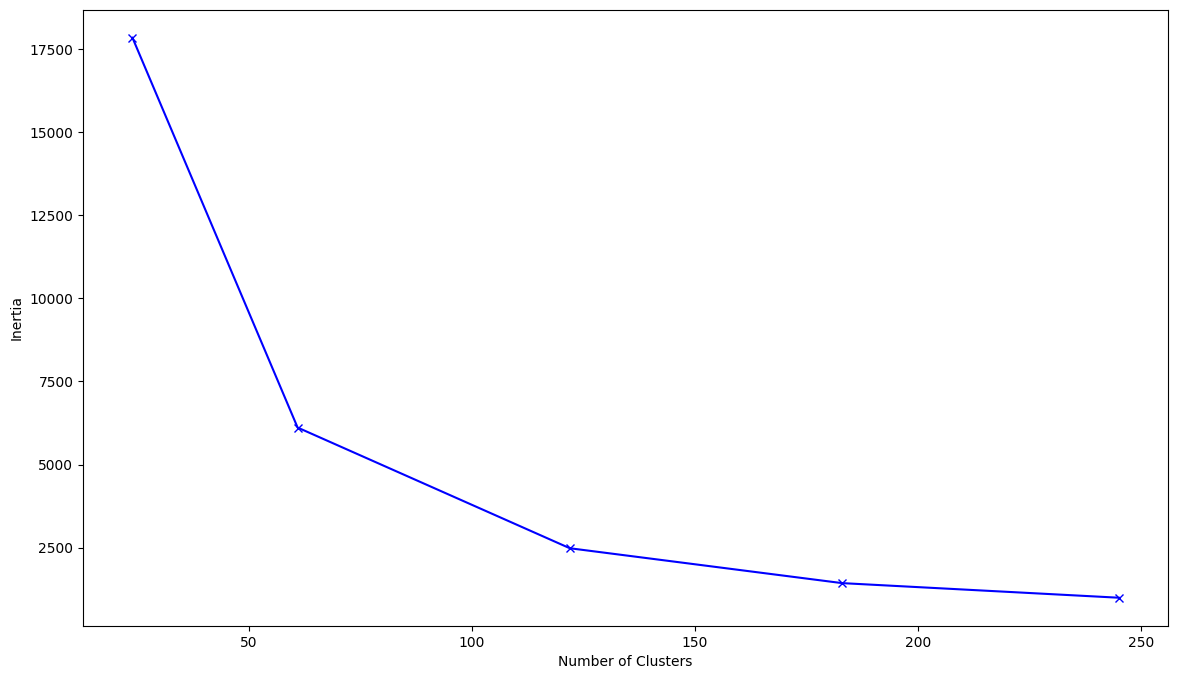


Predicting entities for role: ARG0...
Computing phrase embeddings...


  0%|          | 135/50128 [03:47<23:25:33,  1.69s/it]


KeyboardInterrupt: 

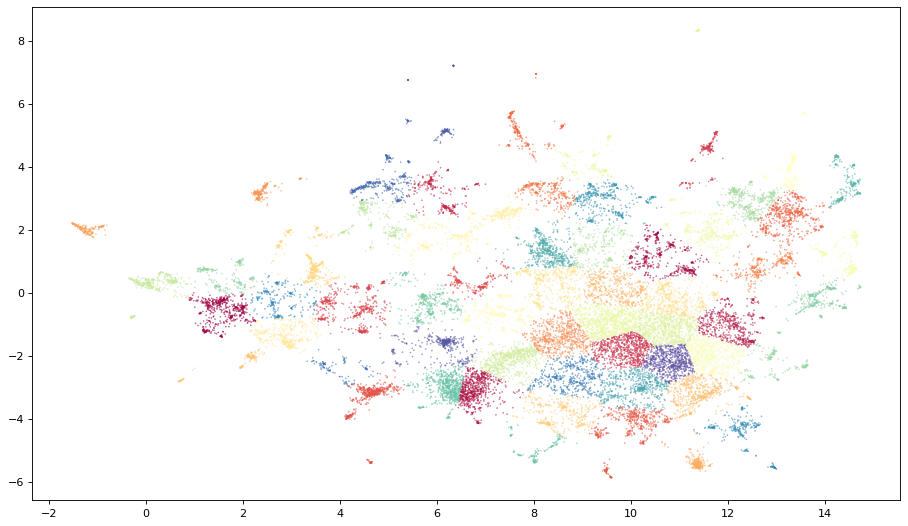

In [10]:
from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)    
             
m.fit(postproc_roles, progress_bar = True) 
m.plot_selection_metric(metric = 'inertia') 
m.plot_clusters(path = './output/clusters.pdf') 
m.clusters_to_txt(path = './output/clusters.txt')
narratives = m.predict(postproc_roles, progress_bar = True)

In [ ]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives: 
    pretty_narratives.append(prettify(n))

for i in range(10):           
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

In [ ]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 100, 
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = './output/network_of_narratives.html'
    )

In [ ]:
import pickle as pk 

with open('./output/narrative_model.pkl','wb') as f:
    pk.dump(m,f)
with open('./output/narrative_model.pkl','rb') as f:
    m = pk.load(f)